In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [2]:
# Importing the dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Transformung the dataset into pd.DataFrame
bosdf = pd.DataFrame(boston.data, columns=boston.feature_names)
bosdf['price'] = boston.target

In [4]:
bosdf.shape

(506, 14)

In [5]:
bosdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Counting an amount of missing values
bosdf.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [7]:
# sweet :)

In [8]:
bosdf.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [9]:
bosdf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
X = bosdf.iloc[:, :-1].values
y = bosdf.iloc[:, -1].values

In [11]:
# Splitting the full dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, 
                                                                        test_size = 0.25, 
                                                                        random_state = 0)

In [12]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_full, y_train_full)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Predicting the test set results
y_pred_full = regressor.predict(X_test_full)

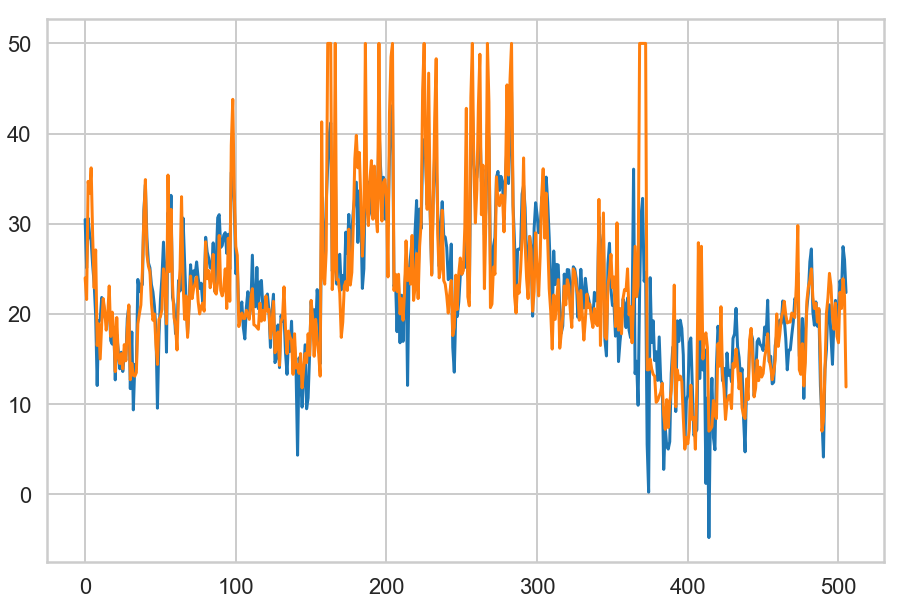

In [14]:
# Displaying the results
plt.figure(figsize=(15, 10))
y_pred = regressor.predict(X)
plt.plot(y_pred)
plt.plot(y)
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_full, y_pred_full)
print(mse)

29.790559164238537


In [16]:
bosdiff = pd.DataFrame(np.column_stack([y_pred_full, y_test_full, (y_pred_full - y_test_full)/y_test_full]),
                       columns=['y_predicted', 'y_actual', 'relative_difference'])

In [17]:
bosdiff.describe()

,y_predicted,y_actual,relative_difference
count,127.000000,127.000000,127.000000
mean,21.809713,22.306299,0.006828
std,7.726571,9.074548,0.249314
min,0.231884,5.600000,-0.983197
25%,17.665549,17.150000,-0.107702
50%,21.521517,21.000000,0.017402
75%,25.181065,24.300000,0.135050
max,44.631940,50.000000,0.961200


In [18]:
# Definig the function for model optimization\
def backwardElimination(x, y, sl):
    numVars = len(x[0])
    for i in range(numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            x = np.delete(x, list(regressor_OLS.pvalues).index(maxVar), 1)
    print(regressor_OLS.summary())
    return x

In [19]:
# Building the optional model using Backward Elemination
SL = 0.05
X_w_const = np.append(np.ones((X.shape[0], 1)), X, axis = 1)
X_modeled = backwardElimination(X_w_const, y, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          5.74e-137
Time:                        15:06:56   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3694      5.069      7.176      0.0

In [20]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_full, y_train_full)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
# Predicting the test set results
y_pred_full = regressor.predict(X_test_full)

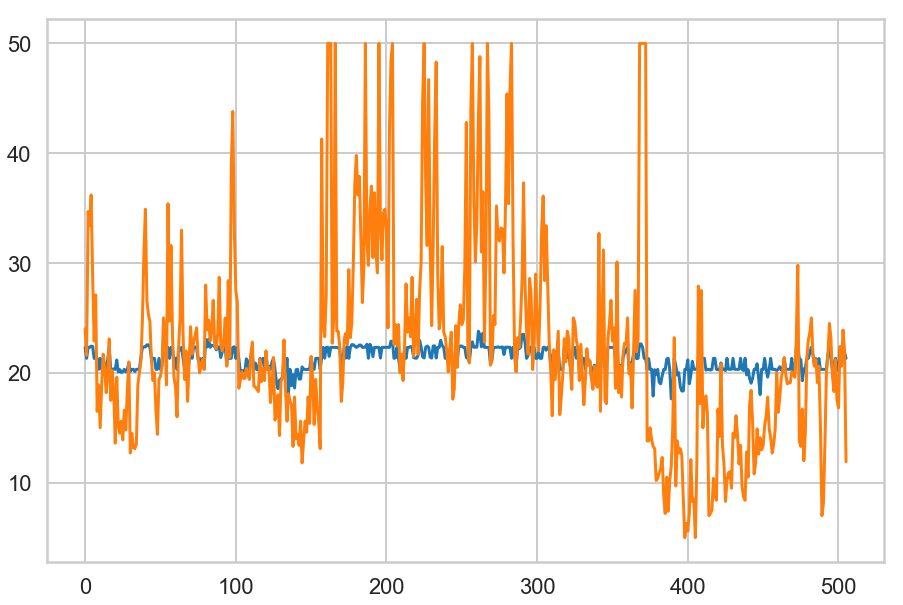

In [22]:
# Displaying the results
plt.figure(figsize=(15, 10))
y_pred = regressor.predict(X)
plt.plot(y_pred)
plt.plot(y)
plt.show()

In [23]:
mse = mean_squared_error(y_test_full, y_pred_full)
print(mse)

81.28946286687945


In [24]:
# Fitting the Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, 
                                  random_state = 0)
regressor.fit(X_train_full, y_train_full)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
# Predicting the test set results
y_pred_full = regressor.predict(X_test_full)

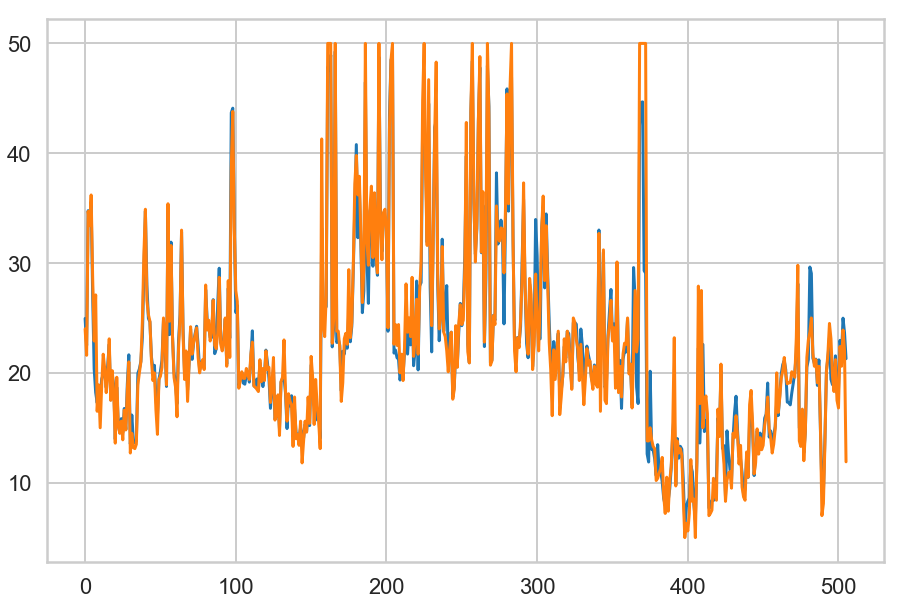

In [26]:
# Displaying the results
plt.figure(figsize=(15, 10))
y_pred = regressor.predict(X)
plt.plot(y_pred)
plt.plot(y)
plt.show()

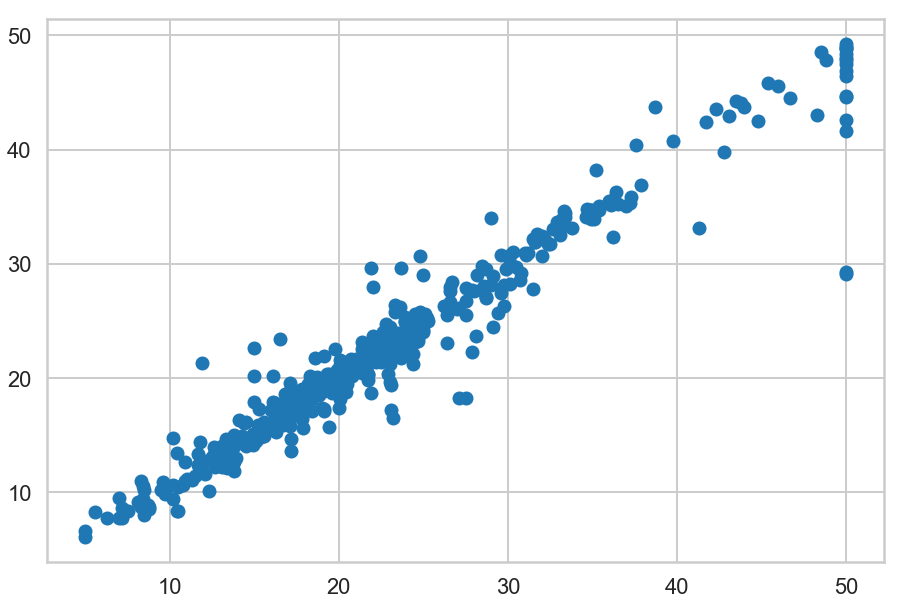

In [31]:
# Displaying the results
plt.figure(figsize=(15, 10))
plt.scatter(y, y_pred)
plt.show()

In [32]:
mse = mean_squared_error(y_test_full, y_pred_full)
print(mse)

16.399050472755867


In [33]:
bosdiff = pd.DataFrame(np.column_stack([y_pred_full, y_test_full, (y_pred_full - y_test_full)/y_test_full]),
                       columns=['y_predicted', 'y_actual', 'relative_difference'])

In [34]:
bosdiff.describe()

,y_predicted,y_actual,relative_difference
count,127.000000,127.000000,127.000000
mean,21.682726,22.306299,0.001324
std,7.668773,9.074548,0.169671
min,8.310000,5.600000,-0.418428
25%,17.928000,17.150000,-0.094974
50%,20.709200,21.000000,0.000227
75%,23.570900,24.300000,0.054194
max,47.526400,50.000000,0.789126
